In [9]:
# Fraud Detection Using Paysim Dataset (in replacement for PayPal)
# Step 1. Lets Import the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [8]:
# Step 2. Load the Dataset
df = pd.read_csv('paysim dataset.csv')
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
# Step 3. Data Overview
print("\n--- Info ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

--- Summary Statistics ---
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00

In [11]:
# Step4. Cleaning and Preprocessing the Dataset

# Remove duplicates
df = df.drop_duplicates()

# Convert column names to lowercase for consistency
df.columns = [col.lower() for col in df.columns]

# Check for NaNs again after cleanup
print("\nMissing values after cleanup:")
print(df.isnull().sum())




Missing values after cleanup:
step              0
type              0
amount            0
nameorig          0
oldbalanceorg     0
newbalanceorig    0
namedest          0
oldbalancedest    0
newbalancedest    0
isfraud           0
isflaggedfraud    0
dtype: int64


In [17]:
# Step 5. Feature Engineering

# Encode categorical columns
if 'type' in df.columns:
    le = LabelEncoder()
    df['type_encoded'] = le.fit_transform(df['type'])

# Example feature: difference between old and new balance
df['error_balance_orig'] = df['oldbalanceorg'] - df['amount'] - df['newbalanceorig']
df['error_balance_dest'] = df['oldbalancedest'] + df['amount'] - df['newbalancedest']

# Flag transactions where balance errors are suspicious
df['orig_error_flag'] = df['error_balance_orig'].apply(lambda x: 1 if abs(x) > 0.01 else 0)
df['dest_error_flag'] = df['error_balance_dest'].apply(lambda x: 1 if abs(x) > 0.01 else 0)


In [13]:
# Step 6. Data Quality Check & Ethical Considerations

# Bias check: fraud by transaction type
fraud_counts = df[df['isfraud'] == 1]['type'].value_counts()
print("\nFraud Transaction Types:\n", fraud_counts)

# Check for class imbalance
print("\nClass distribution:\n", df['isfraud'].value_counts(normalize=True))



Fraud Transaction Types:
 type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

Class distribution:
 isfraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


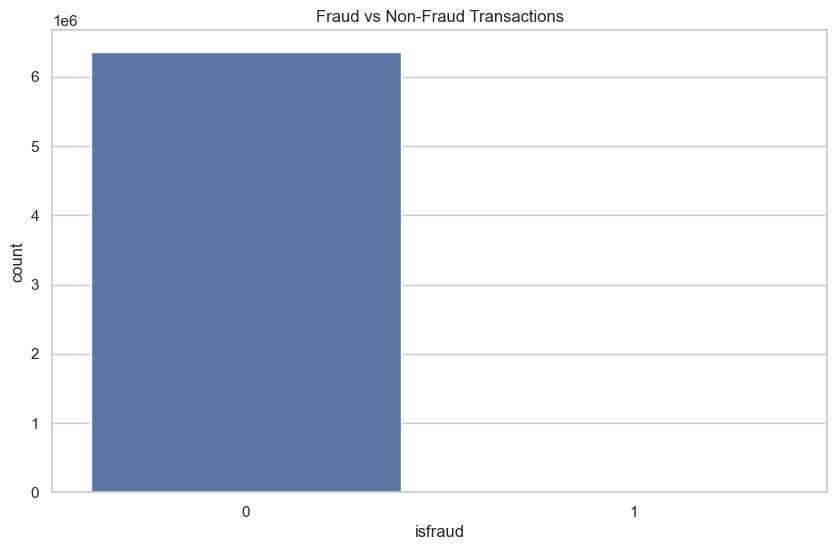

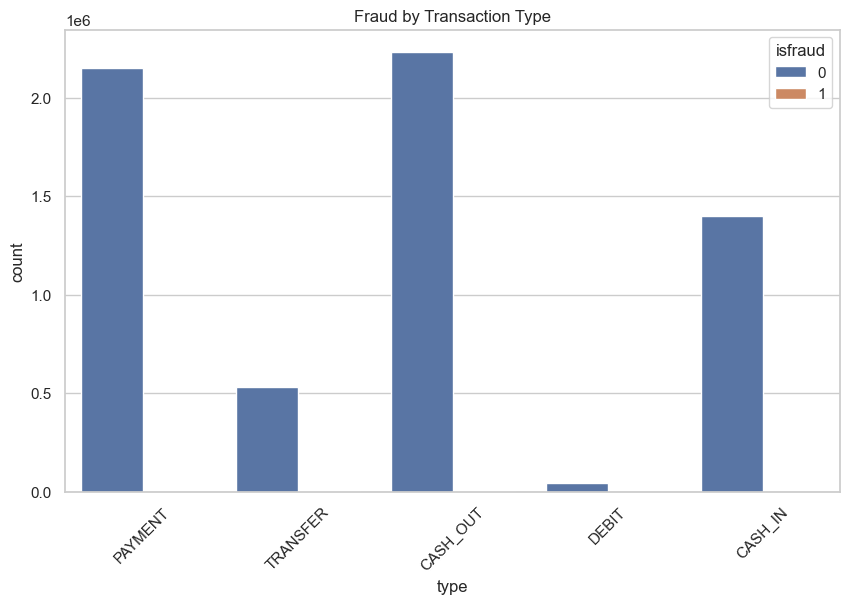

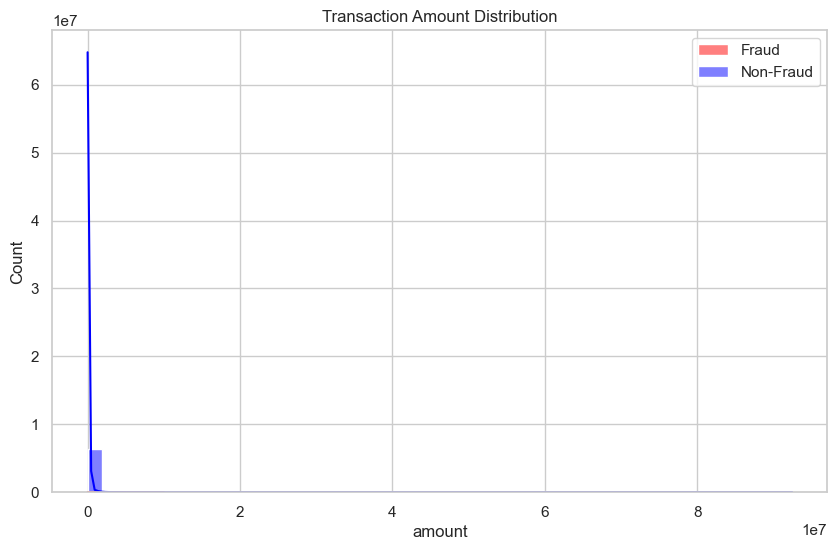

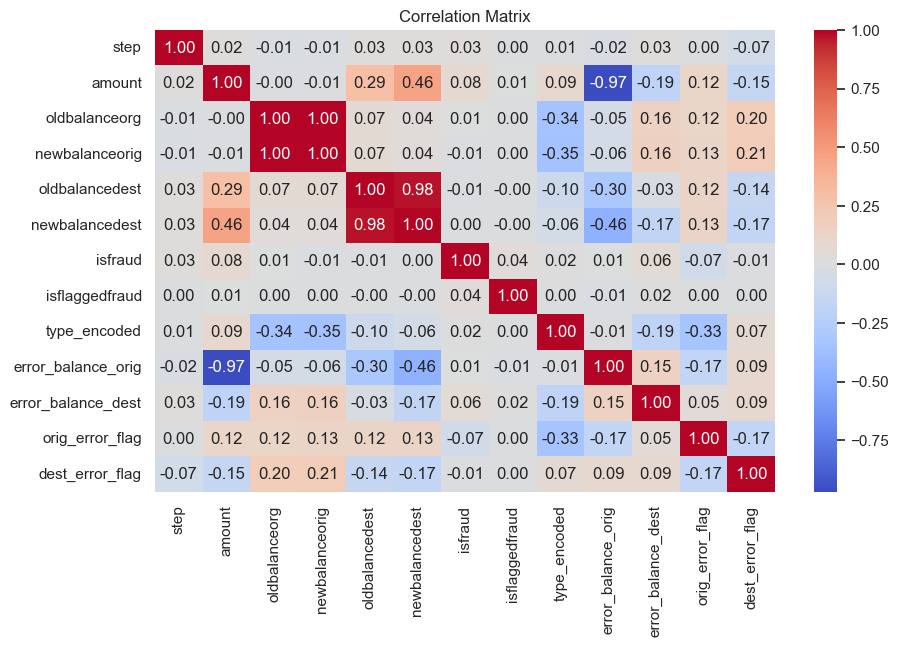

In [20]:
# Step 7. Performing Exploratory Data Analysis

# Plot class distribution
sns.countplot(x='isfraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.savefig('Fraud vs Non Fraud Transaction.png')
plt.show()

# Transaction types by fraud
sns.countplot(x='type', hue='isfraud', data=df)
plt.title('Fraud by Transaction Type')
plt.xticks(rotation=45)
plt.savefig('Transaction Type by Fraud.png')
plt.show()

# Amount distribution
sns.histplot(df[df['isfraud'] == 1]['amount'], bins=50, kde=True, color='red', label='Fraud')
sns.histplot(df[df['isfraud'] == 0]['amount'], bins=50, kde=True, color='blue', label='Non-Fraud')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.savefig('Amount Distribution.png')
plt.show()

# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('Fraud vs Non Fraud Correlation Matrix.png')
plt.show()


In [23]:
# Step8. FINALIZE DATASET

# Drop original categorical column if encoded
df_final = df.drop(columns=['type']) if 'type_encoded' in df.columns else df.copy()

# Save cleaned and transformed dataset
df_final.to_csv('Finalised_Dataset_paysim_cleaned.csv', index=False)
print("\n✅ Final dataset saved as 'Finalised Dataset- paysim_cleaned.csv'")



✅ Final dataset saved as 'Finalised Dataset- paysim_cleaned.csv'
